<a href="https://colab.research.google.com/github/jyns417/Datathon/blob/dev/datathon4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from bubbly.bubbly import bubbleplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
init_notebook_mode(connected=True)
import os
from PIL import Image
pio.renderers.default = "colab"

PATH = "/content"
print(os.listdir(PATH))

['.config', 'noc_regions.csv', 'athlete_events.csv', 'sample_data']


In [4]:
# 파일 저장
athlete_events_df = pd.read_csv(PATH+"/athlete_events.csv")
noc_regions_df = pd.read_csv(PATH+"/noc_regions.csv")

In [5]:
# data 형태
print("Athletes and Events data -  rows:",athlete_events_df.shape[0]," columns:", athlete_events_df.shape[1])
print("NOC Regions data -  rows:",noc_regions_df.shape[0]," columns:", noc_regions_df.shape[1])

Athletes and Events data -  rows: 271116  columns: 15
NOC Regions data -  rows: 230  columns: 3


In [6]:
athlete_events_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
noc_regions_df.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
# Athlete 누락 데이터 확인
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(athlete_events_df)

,Total,Percent
Medal,231333,85.326207
Weight,62875,23.191180
Height,60171,22.193821
Age,9474,3.494445
ID,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Team,0,0.000000
NOC,0,0.000000
Games,0,0.000000


In [9]:
# NOC의 누락 데이터를 살펴보자
missing_data(noc_regions_df)

,Total,Percent
notes,209,90.869565
region,3,1.304348
NOC,0,0.000000


In [10]:
#개최연도 도시 동계 하계를 구분해보자
tmp = athlete_events_df.groupby(['Year', 'City'])['Season'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()

In [11]:
# 샘플 다섯개 보기
df.head(5)

,Year,City,Season,Athlets
0,1896,Athina,Summer,380
1,1900,Paris,Summer,1936
2,1904,St. Louis,Summer,1301
3,1906,Athina,Summer,1733
4,1908,London,Summer,3101


In [13]:
# 연도별 동계하계 올림픽 선수 수
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Scatter(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    mode = "markers+lines"
)
traceW = go.Scatter(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    mode = "markers+lines"
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True),
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets2')


In [14]:
#막대 그래프 만들기, 도시 추가
tmp = athlete_events_df.groupby('Year')['City'].value_counts()
df2 = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
df2 = df2.merge(df)

In [15]:
iplot(ff.create_table(df2.head(3)), filename='jupyter-table2')

In [16]:
#막대 그래프 변형
traceS = go.Bar(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='black',
                    width=0.75),
                opacity=0.7,
            ),
    text=dfS['City'],

)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(
                color='rgb(11,23,245)',
                line=dict(
                    color='black',
                    width=0.75),
                opacity=0.7,
            ),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True),
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets4')

In [17]:
#종목을 살펴보자
tmp = athlete_events_df.groupby(['Year', 'City','Season'])['Sport'].nunique()
df = pd.DataFrame(data={'Sports': tmp.values}, index=tmp.index).reset_index()

In [18]:
# 동계하계올림픽 종목 수
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Bar(
    x = dfS['Year'],y = dfS['Sports'],
    name="Summer Games",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= dfS['City'],
)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Sports'],
    name="Winter Games",
    marker=dict(
                color='rgb(11,23,245)',
                line=dict(
                    color='blue',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Sports per Olympic edition',
          xaxis = dict(title = 'Year', showticklabels=True),
          yaxis = dict(title = 'Number of sports'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

In [20]:
# noc_regions와 athlete_events를 병합
olympics_df = athlete_events_df.merge(noc_regions_df)
print("All Olympics data -  rows:",olympics_df.shape[0]," columns:", olympics_df.shape[1])

All Olympics data -  rows: 270767  columns: 17


In [25]:
# columns을 국가로 교체, 몇번 참가했는지
olympics_df=olympics_df.rename(columns = {'region':'Country'})

tmp = olympics_df.groupby(['Country'])['Year'].nunique()
df = pd.DataFrame(data={'Editions': tmp.values}, index=tmp.index).reset_index()
df.head(5)

,Country,Editions
0,Afghanistan,14
1,Albania,11
2,Algeria,15
3,American Samoa,9
4,Andorra,17


In [26]:
#동계하계올림픽 총합 참가 횟수
trace = go.Choropleth(
            locations = df['Country'],
            locationmode='country names',
            z = df['Editions'],
            text = df['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Editions',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Olympic countries',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [27]:
#종목별 참가자 수
tmp = athlete_events_df.groupby(['Year', 'City','Season'])['Sport'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
df.head(3)

,Year,City,Season,Sport,Athlets
0,1896,Athina,Summer,Athletics,106
1,1896,Athina,Summer,Gymnastics,97
2,1896,Athina,Summer,Shooting,65


In [28]:
sports = (athlete_events_df.groupby(['Sport'])['Sport'].nunique()).index

In [29]:
def draw_trace(dataset, sport):
    dfS = dataset[dataset['Sport']==sport];
    trace = go.Box(
        x = dfS['Athlets'],
        name=sport,
         marker=dict(
                    line=dict(
                        color='black',
                        width=0.8),
                ),
        text=dfS['City'],
        orientation = 'h'
    )
    return trace


def draw_group(dataset, title,height=800):
    data = list()
    for sport in sports:
        data.append(draw_trace(dataset, sport))


    layout = dict(title = title,
              xaxis = dict(title = 'Number of athlets',showticklabels=True),
              yaxis = dict(title = 'Sport', showticklabels=True, tickfont=dict(
                family='Old Standard TT, serif',
                size=8,
                color='black'),),
              hovermode = 'closest',
              showlegend=False,
                  width=800,
                  height=height,
             )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='events-sports1')

# select only Summer Olympics
df_S = df[df['Season']=='Summer']
# draw the boxplots for the Summer Olympics
draw_group(df_S, "Athlets per Sport (Summer Olympics)")

In [31]:
# 동계 올림픽
df_W = df[df['Season']=='Winter']
draw_group(df_W, "Athlets per Sport (Winter Olympics)",600)

In [32]:
#올림픽 회차별 메달 수
tmp = olympics_df.groupby(['Year', 'City','Season', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

In [33]:
dfG.head()

,Year,City,Season,Medal,ID
1,1896,Athina,Summer,Gold,62
4,1900,Paris,Summer,Gold,201
7,1904,St. Louis,Summer,Gold,173
10,1906,Athina,Summer,Gold,157
13,1908,London,Summer,Gold,294


In [34]:
traceG = go.Bar(
    x = dfG['Year'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['City']+ " (" + dfG['Season'] + ")",
)
traceS = go.Bar(
    x = dfS['Year'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['City']+ " (" + dfS['Season'] + ")",
)

traceB = go.Bar(
    x = dfB['Year'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['City']+ " (" + dfB['Season'] + ")",
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per Olympic edition',
          xaxis = dict(title = 'Year', showticklabels=True),
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

In [35]:
#종목별 메달 수
tmp = olympics_df.groupby(['Sport', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

In [36]:
traceG = go.Bar(
    x = dfG['Sport'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['Sport'],
    #orientation = 'h'
)
traceS = go.Bar(
    x = dfS['Sport'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['Sport'],
    #orientation = 'h'
)

traceB = go.Bar(
    x = dfB['Sport'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['Sport'],
   # orientation = 'h'
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per sport',
          xaxis = dict(title = 'Sport', showticklabels=True, tickangle=45,
            tickfont=dict(
                size=8,
                color='black'),),
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack',
          showlegend=False,
          width=900,
          height=600,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

In [37]:
#다시 두개 데이터 합치기
olympics_df = athlete_events_df.merge(noc_regions_df)
print("All Olympics data -  rows:",olympics_df.shape[0]," columns:", olympics_df.shape[1])

All Olympics data -  rows: 270767  columns: 17


In [38]:
#금메달 보유자 평균
gold_medalists = olympics_df[olympics_df.Medal == 'Gold']
gold_medalists.describe()

,ID,Age,Height,Weight,Year
count,13371.000000,13223.000000,10538.000000,10253.000000,13371.000000
mean,69355.428689,25.901384,177.897893,74.183897,1973.128412
std,39029.410811,5.892956,11.052886,15.208167,34.178421
min,4.000000,13.000000,136.000000,28.000000,1896.000000
25%,36052.500000,22.000000,170.000000,63.000000,1952.000000
50%,69065.000000,25.000000,178.000000,73.000000,1984.000000
75%,103704.000000,29.000000,185.000000,84.000000,2002.000000
max,135553.000000,64.000000,223.000000,170.000000,2016.000000


In [39]:
#금메달 국가
gold_count_countries = (gold_medalists[gold_medalists.Year > 1992]
                        .loc[:,['region','Year']].groupby(['region','Year']).size().reset_index(name='Medal')
                        .sort_values(by=['Year','Medal'],ascending=[True,False])
                        .groupby(['Year']).head(5)
                        )


countries = gold_count_countries['region'].unique()
years = gold_count_countries['Year'].unique()

In [40]:
top_countries_over_years = (gold_medalists.loc[:,['Year','region','Sport']].groupby(['Year','region','Sport']).size().reset_index(name='Medal')
                 .sort_values(['Year','Sport', 'Medal'], ascending=[True,True, False])
                 .groupby(['Year','Sport']).first().reset_index()
)

wl_gym_box = (top_countries_over_years[(top_countries_over_years.Sport == 'Athletics')
                                       | (top_countries_over_years.Sport == 'Swimming')
                                       | (top_countries_over_years.Sport == 'Rowing')]
              )

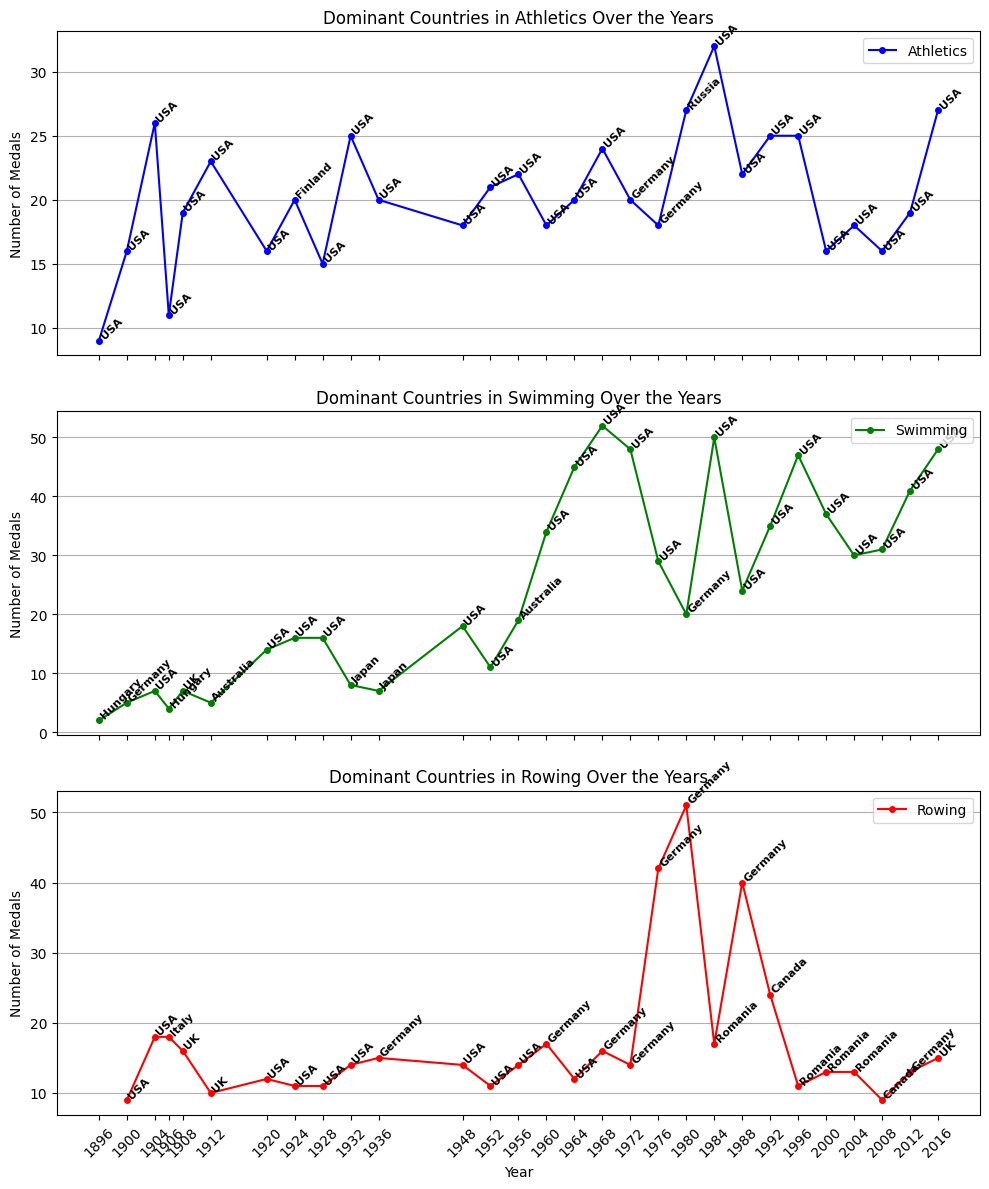

In [41]:
#연도별 육상, 수영, 로잉의 최강 국가
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

colors = {'Athletics': 'blue', 'Swimming': 'green', 'Rowing': 'red'}

for ax, sport in zip(axes, wl_gym_box['Sport'].unique()):
    sport_data = wl_gym_box[wl_gym_box['Sport'] == sport]
    ax.plot(sport_data['Year'], sport_data['Medal'], marker='o',markersize=4, color=colors[sport], label=sport)

    # Annotate the plot with country names
    for i in range(len(sport_data)):
        ax.text(sport_data.iloc[i]['Year'], sport_data.iloc[i]['Medal'], sport_data.iloc[i]['region'],
                fontsize=8, verticalalignment='bottom',rotation= 45,fontweight='bold')

    ax.set_ylabel('Number of Medals')
    ax.set_title(f'Dominant Countries in {sport} Over the Years')
    ax.legend()
    ax.grid(True, axis='y')

plt.xlabel('Year')
plt.xticks(wl_gym_box['Year'].unique(), rotation=45)
plt.tight_layout()

plt.show()